In [1]:
import numpy as np
import os

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
sns.set(style='white')


# Vanishing/Exploding Gradients Problem


In [2]:
def logit(z):
    return 1/(1+np.exp(-z))


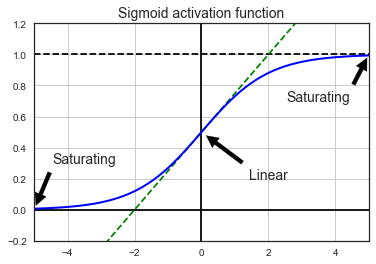

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

# Xavier and He Initialization

In [2]:
import tensorflow as tf

In [6]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 =100

X = tf.placeholder(tf.float32,shape= (None,n_inputs),name='X')

In [7]:
he_init = tf.contrib.layers.variance_scaling_initializer()
hidden1 = tf.layers.dense(X,n_hidden1,activation = tf.nn.relu,
                          kernel_initializer=he_init,name='hidden1'
                         )

# Nonsaturating Activation Function

Leaky ReLu

In [8]:
def leaky_relu(z,alpha=0.01):
    return np.maximum(alpha*z,z)


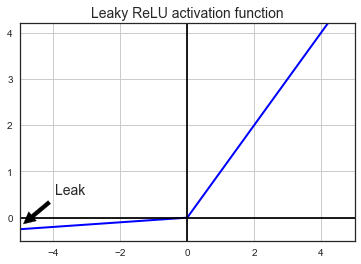

In [9]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [10]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')

In [11]:
def leaky_relu(z,name=None):
    return tf.maximum(0.01*z,z,name=name)

hidden1 = tf.layers.dense(X,n_hidden1,activation=leaky_relu,name='hidden1')

train a neural network on MNIST using the Leaky ReLu.



In [12]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10




In [13]:
X = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')
y = tf.placeholder(tf.int64,shape=(None),name='y')

In [14]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X,n_hidden1,activation=leaky_relu,name='hidden1')
    hidden2 = tf.layers.dense(hidden1,n_hidden2,activation=leaky_relu,name='hidden2')
    logits = tf.layers.dense(hidden2,n_outputs,name='outputs')

In [15]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy,name='loss')

In [16]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [17]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [19]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Load the data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:/python_work/handson_ml/datasets')

Extracting E:/python_work/handson_ml/datasets\train-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\train-labels-idx1-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-images-idx3-ubyte.gz
Extracting E:/python_work/handson_ml/datasets\t10k-labels-idx1-ubyte.gz


In [23]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iter in range(mnist.train.num_examples // batch_size):
            
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        if epoch % 5 ==0:
            acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
            acc_test = accuracy.eval(feed_dict={X:mnist.validation.images,y:mnist.validation.labels})
            print(epoch,'Batch accuracy:',acc_train,'Validation accuracy:',acc_test)
    save_path = saver.save(sess,'E:/python_work/handson_ml/tf_logs/run-20170919')

0 Batch accuracy: 0.86 Validation accuracy: 0.9044
5 Batch accuracy: 0.94 Validation accuracy: 0.951
10 Batch accuracy: 0.96 Validation accuracy: 0.9666
15 Batch accuracy: 1.0 Validation accuracy: 0.972
20 Batch accuracy: 1.0 Validation accuracy: 0.9748
25 Batch accuracy: 1.0 Validation accuracy: 0.9764
30 Batch accuracy: 0.98 Validation accuracy: 0.978
35 Batch accuracy: 0.96 Validation accuracy: 0.9792


# ELU

In [24]:
def elu(z,alpha=1):
    return np.where(z<0,alpha*(np.exp(z)-1),z)

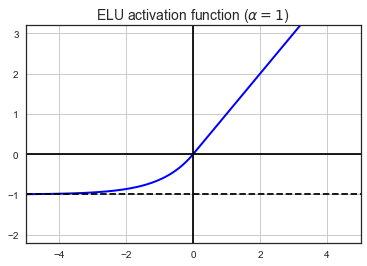

In [25]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [26]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')

In [27]:
hidden1 = tf.layers.dense(X,n_hidden1,activation=tf.nn.elu,name='hidden1')


# SELU

In [29]:
def selu(z,scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z,alpha)

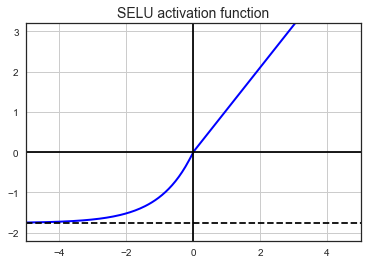

In [30]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [31]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


In [34]:
tf.nn.selu

AttributeError: module 'tensorflow.python.ops.nn' has no attribute 'selu'

In [35]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [36]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
#saver = tf.train.Saver()
n_epochs = 40
batch_size = 50

In [37]:
means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True) + 1e-10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_test)

    #save_path = saver.save(sess, "./my_model_final_selu.ckpt")

0 Batch accuracy: 0.96 Validation accuracy: 0.924
5 Batch accuracy: 1.0 Validation accuracy: 0.9568
10 Batch accuracy: 0.94 Validation accuracy: 0.967
15 Batch accuracy: 0.98 Validation accuracy: 0.9686
20 Batch accuracy: 1.0 Validation accuracy: 0.971
25 Batch accuracy: 1.0 Validation accuracy: 0.9692
30 Batch accuracy: 1.0 Validation accuracy: 0.9702
35 Batch accuracy: 1.0 Validation accuracy: 0.971


# Batch Normalization

In [38]:
reset_graph()


n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = tf.layers.batch_normalization(logits_before_bn, training=training,
                                       momentum=0.9)

In [4]:
from functools import partial


In [40]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
training = tf.placeholder_with_default(False, shape=(), name='training')

In [41]:
my_batch_norm_layer = partial(tf.layers.batch_normalization,
                              training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = my_batch_norm_layer(logits_before_bn)

In [42]:
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()

    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
#with tf.name_scope('train'):
#    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
#    with tf.control_dependencies(extra_update_ops):
#        training_op = optimizer.minimize(loss)
##this way you would just have to evaluate the traing_op during training.
#sess.run(trainging_op,feed_dict={training:True,X:X_batch,y:y_batch})

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
#saver = tf.train.Saver()

In [43]:
n_epochs = 40
batch_size = 200

In [44]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

#    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Test accuracy: 0.8721
1 Test accuracy: 0.8981
2 Test accuracy: 0.9134
3 Test accuracy: 0.9238
4 Test accuracy: 0.9297
5 Test accuracy: 0.9352
6 Test accuracy: 0.9405
7 Test accuracy: 0.9436
8 Test accuracy: 0.947
9 Test accuracy: 0.9502
10 Test accuracy: 0.9528
11 Test accuracy: 0.9549
12 Test accuracy: 0.9566
13 Test accuracy: 0.9589
14 Test accuracy: 0.9602
15 Test accuracy: 0.9612
16 Test accuracy: 0.962
17 Test accuracy: 0.9637
18 Test accuracy: 0.9651
19 Test accuracy: 0.9656
20 Test accuracy: 0.9664
21 Test accuracy: 0.967
22 Test accuracy: 0.9672
23 Test accuracy: 0.9668
24 Test accuracy: 0.9676
25 Test accuracy: 0.9698
26 Test accuracy: 0.9695
27 Test accuracy: 0.9691
28 Test accuracy: 0.9699
29 Test accuracy: 0.9711
30 Test accuracy: 0.9709
31 Test accuracy: 0.9715
32 Test accuracy: 0.9716
33 Test accuracy: 0.9728
34 Test accuracy: 0.9722
35 Test accuracy: 0.9728
36 Test accuracy: 0.9727
37 Test accuracy: 0.9741
38 Test accuracy: 0.9735
39 Test accuracy: 0.974
40 Test accura

In [45]:
[v.name for v in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/beta:0',
 'batch_normalization/gamma:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/gamma:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/gamma:0']

In [46]:
[v.name for v in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/beta:0',
 'batch_normalization/gamma:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']

# Gradient Clipping

In [47]:

reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [48]:
learning_rate = 0.01

In [49]:
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad,-threshold,threshold),var) 
              for grad,var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

In [50]:

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [55]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [52]:
n_epochs = 30
batch_size = 200

In [57]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iterion in range(mnist.train.num_examples // batch_size):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        accuracy_val = accuracy.eval(feed_dict={X:mnist.test.images,
                                               y:mnist.test.labels})
        print(epoch,'Test accuracy:',accuracy_val)
        
    save_path = saver.save(sess,'E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt')

0 Test accuracy: 0.3035
1 Test accuracy: 0.7982
2 Test accuracy: 0.8841
3 Test accuracy: 0.9026
4 Test accuracy: 0.9109
5 Test accuracy: 0.9196
6 Test accuracy: 0.9263
7 Test accuracy: 0.931
8 Test accuracy: 0.9338
9 Test accuracy: 0.9408
10 Test accuracy: 0.9408
11 Test accuracy: 0.9459
12 Test accuracy: 0.9466
13 Test accuracy: 0.949
14 Test accuracy: 0.9505
15 Test accuracy: 0.9524
16 Test accuracy: 0.9551
17 Test accuracy: 0.9544
18 Test accuracy: 0.9574
19 Test accuracy: 0.9601
20 Test accuracy: 0.959
21 Test accuracy: 0.9615
22 Test accuracy: 0.9627
23 Test accuracy: 0.9627
24 Test accuracy: 0.9632
25 Test accuracy: 0.9649
26 Test accuracy: 0.9655
27 Test accuracy: 0.9629
28 Test accuracy: 0.9665
29 Test accuracy: 0.9665


# Reusing Pretrained Layers

In [58]:
reset_graph()

In [60]:
saver = tf.train.import_meta_graph('E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt.meta')

In [61]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
dn

In [62]:

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

accuracy = tf.get_default_graph().get_tensor_by_name("eval/accuracy:0")

training_op = tf.get_default_graph().get_operation_by_name("GradientDescent")

In [63]:
for op in (X,y,accuracy,training_op):
    tf.add_to_collection('my_important_ops',op)

In [65]:
X,y,accuracy,training_op = tf.get_collection('my_important_ops')

In [66]:
X

<tf.Tensor 'X:0' shape=(?, 784) dtype=float32>

In [67]:
with tf.Session() as sess:
    saver.restore(sess,'E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt')

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt


In [68]:
with tf.Session() as sess:
    saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt")

    for epoch in range(20):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170919_2/my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt
0 Test accuracy: 0.9669
1 Test accuracy: 0.9687
2 Test accuracy: 0.9673
3 Test accuracy: 0.9669
4 Test accuracy: 0.9681
5 Test accuracy: 0.9679
6 Test accuracy: 0.969
7 Test accuracy: 0.9697
8 Test accuracy: 0.9691
9 Test accuracy: 0.9689
10 Test accuracy: 0.9692
11 Test accuracy: 0.9698
12 Test accuracy: 0.9703
13 Test accuracy: 0.971
14 Test accuracy: 0.9708
15 Test accuracy: 0.9705
16 Test accuracy: 0.9697
17 Test accuracy: 0.9714
18 Test accuracy: 0.971
19 Test accuracy: 0.9712


In [69]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
dn

In [70]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_final.ckpt")

In [7]:
import tensorflow as tf
learning_rate = 0.01
reset_graph()

n_hidden4 = 20  # new layer
n_outputs = 10  # new layer

saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden3 = tf.get_default_graph().get_tensor_by_name("dnn/hidden4/Relu:0")

new_hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="new_hidden4")
new_logits = tf.layers.dense(new_hidden4, n_outputs, name="new_outputs")

with tf.name_scope("new_loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=new_logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("new_eval"):
    correct = tf.nn.in_top_k(new_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("new_train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [10]:
n_epochs = 30
batch_size = 200
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = new_saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170919_3/my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt
0 Test accuracy: 0.9175
1 Test accuracy: 0.9464
2 Test accuracy: 0.9545
3 Test accuracy: 0.958
4 Test accuracy: 0.9595
5 Test accuracy: 0.9619
6 Test accuracy: 0.9635
7 Test accuracy: 0.962
8 Test accuracy: 0.9645
9 Test accuracy: 0.9634
10 Test accuracy: 0.967
11 Test accuracy: 0.9663
12 Test accuracy: 0.9675
13 Test accuracy: 0.9616
14 Test accuracy: 0.9686
15 Test accuracy: 0.9694
16 Test accuracy: 0.9681
17 Test accuracy: 0.9667
18 Test accuracy: 0.9689
19 Test accuracy: 0.9697
20 Test accuracy: 0.9697
21 Test accuracy: 0.9681
22 Test accuracy: 0.9694
23 Test accuracy: 0.9699
24 Test accuracy: 0.9702
25 Test accuracy: 0.9712
26 Test accuracy: 0.97
27 Test accuracy: 0.9699
28 Test accuracy: 0.9712
29 Test accuracy: 0.9692


In [11]:
saver = tf.train.import_meta_graph('E:/python_work/handson_ml/tf_logs/run_20170919_3/my_new_model_final.ckpt.meta')

In [12]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
dn

In [13]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [14]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt")

    for epoch in range(n_epochs):                                      # not shown in the book
        for iteration in range(mnist.train.num_examples // batch_size): # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)      # not shown
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})  # not shown
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,  # not shown
                                                y: mnist.test.labels}) # not shown
        print(epoch, "Test accuracy:", accuracy_val)                   # not shown

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170919_4/my_new_model_final.ckpt")


INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt
0 Test accuracy: 0.9058
1 Test accuracy: 0.9345
2 Test accuracy: 0.943
3 Test accuracy: 0.9501
4 Test accuracy: 0.951
5 Test accuracy: 0.9566
6 Test accuracy: 0.9587
7 Test accuracy: 0.961
8 Test accuracy: 0.9609
9 Test accuracy: 0.9637
10 Test accuracy: 0.9641
11 Test accuracy: 0.9642
12 Test accuracy: 0.9659
13 Test accuracy: 0.9641
14 Test accuracy: 0.9682
15 Test accuracy: 0.9669
16 Test accuracy: 0.9684
17 Test accuracy: 0.9684
18 Test accuracy: 0.9699
19 Test accuracy: 0.969
20 Test accuracy: 0.9684
21 Test accuracy: 0.9709
22 Test accuracy: 0.971
23 Test accuracy: 0.9693
24 Test accuracy: 0.9706
25 Test accuracy: 0.9726
26 Test accuracy: 0.9716
27 Test accuracy: 0.9725
28 Test accuracy: 0.972
29 Test accuracy: 0.9722


In [15]:
saver = tf.train.import_meta_graph( "E:/python_work/handson_ml/tf_logs/run_20170919_4/my_new_model_final.ckpt.meta")

In [16]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
dnn/hidden1/Relu
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
dn

# Reusing Models from Other Frameworks

In [5]:
reset_graph()
n_inputs = 2
n_hidden1 = 3

In [6]:

original_w = [[1., 2., 3.], [4., 5., 6.]] # Load the weights from the other framework
original_b = [7., 8., 9.]                 # Load the biases from the other framework

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
# [...] Build the rest of the model

# Get a handle on the assignment nodes for the hidden1 variables
graph = tf.get_default_graph()
assign_kernel = graph.get_operation_by_name("hidden1/kernel/Assign")
assign_bias = graph.get_operation_by_name("hidden1/bias/Assign")
init_kernel = assign_kernel.inputs[1]
init_bias = assign_bias.inputs[1]

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init, feed_dict={init_kernel: original_w, init_bias: original_b})
    # [...] Train the model on your new task
    print(hidden1.eval(feed_dict={X: [[10.0, 11.0]]}))  # not shown in the book

[[  61.   83.  105.]]


In [7]:
reset_graph()

n_inputs = 2
n_hidden1 = 3

original_w = [[1., 2., 3.], [4., 5., 6.]] # Load the weights from the other framework
original_b = [7., 8., 9.]                 # Load the biases from the other framework

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
# [...] Build the rest of the model

# Get a handle on the variables of layer hidden1
with tf.variable_scope("", default_name="", reuse=True):  # root scope
    hidden1_weights = tf.get_variable("hidden1/kernel")
    hidden1_biases = tf.get_variable("hidden1/bias")

# Create dedicated placeholders and assignment nodes
original_weights = tf.placeholder(tf.float32, shape=(n_inputs, n_hidden1))
original_biases = tf.placeholder(tf.float32, shape=n_hidden1)
assign_hidden1_weights = tf.assign(hidden1_weights, original_weights)
assign_hidden1_biases = tf.assign(hidden1_biases, original_biases)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    sess.run(assign_hidden1_weights, feed_dict={original_weights: original_w})
    sess.run(assign_hidden1_biases, feed_dict={original_biases: original_b})
    # [...] Train the model on your new task
    print(hidden1.eval(feed_dict={X: [[10.0, 11.0]]}))

[[  61.   83.  105.]]


In [8]:

tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="hidden1")

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

In [9]:
tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")

<tf.Tensor 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>

In [10]:
tf.get_default_graph().get_tensor_by_name("hidden1/bias:0")

<tf.Tensor 'hidden1/bias:0' shape=(3,) dtype=float32_ref>

In [46]:
reset_graph()
    
with tf.device('/gpu:1'):
    i = tf.Variable([[3.0,3.0]])
    j = tf.Variable([[1.0],[2.0]])
    product = tf.matmul(i,j)


config = tf.ConfigProto()
config.allow_soft_placement = True
sess = tf.Session(config=config)
sess.run([i.initializer,j.initializer])
sess.run(product)

print(product)
sess.close()

    

Tensor("MatMul:0", shape=(1, 1), dtype=float32, device=/device:GPU:1)


In [50]:
with tf.device('/gpu:0'):
    i = tf.Variable(3.0,dtype=tf.float32)
#config = tf.ConfigProto()
#config.allow_soft_placement = True    
with tf.Session(config=config) as sess:
    sess.run(i.initializer)

InvalidArgumentError: Cannot assign a device for operation 'Variable_5': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/cpu:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: Variable_5 = VariableV2[container="", dtype=DT_FLOAT, shape=[], shared_name="", _device="/device:GPU:0"]()]]

Caused by op 'Variable_5', defined at:
  File "E:\anaconda\anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\anaconda\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "E:\anaconda\anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "E:\anaconda\anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\anaconda\anaconda\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "E:\anaconda\anaconda\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\anaconda\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\anaconda\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\anaconda\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\anaconda\anaconda\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\anaconda\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\anaconda\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\anaconda\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\anaconda\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-49f70b1d7a32>", line 2, in <module>
    i = tf.Variable(3.0,dtype=tf.float32)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\ops\variables.py", line 297, in _init_from_args
    name=name)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\ops\state_ops.py", line 128, in variable_op_v2
    shared_name=shared_name)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 684, in _variable_v2
    name=name)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\anaconda\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'Variable_5': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/cpu:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: Variable_5 = VariableV2[container="", dtype=DT_FLOAT, shape=[], shared_name="", _device="/device:GPU:0"]()]]


# Freezing the Lower Layers

In [14]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [15]:
with tf.name_scope("train"):                                         # not shown in the book
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)     # not shown
    train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                   scope="hidden[34]|outputs")
    training_op = optimizer.minimize(loss, var_list=train_vars)

In [16]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 30
batch_size = 200
with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt")

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920/my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt
0 Test accuracy: 0.8938
1 Test accuracy: 0.9312
2 Test accuracy: 0.9424
3 Test accuracy: 0.947
4 Test accuracy: 0.9493
5 Test accuracy: 0.9514
6 Test accuracy: 0.9551
7 Test accuracy: 0.9567
8 Test accuracy: 0.9582
9 Test accuracy: 0.9597
10 Test accuracy: 0.9596
11 Test accuracy: 0.9609
12 Test accuracy: 0.9621
13 Test accuracy: 0.9613
14 Test accuracy: 0.9622
15 Test accuracy: 0.9628
16 Test accuracy: 0.963
17 Test accuracy: 0.9625
18 Test accuracy: 0.9632
19 Test accuracy: 0.9637
20 Test accuracy: 0.9632
21 Test accuracy: 0.9648
22 Test accuracy: 0.9632
23 Test accuracy: 0.9642
24 Test accuracy: 0.9648
25 Test accuracy: 0.9646
26 Test accuracy: 0.9649
27 Test accuracy: 0.9647
28 Test accuracy: 0.9651
29 Test accuracy: 0.9649


# #Caching the Frozen Layers

In [17]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              name="hidden1") # reused frozen
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              name="hidden2") # reused frozen & cached
    hidden2_stop = tf.stop_gradient(hidden2)
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation=tf.nn.relu,
                              name="hidden3") # reused, not frozen
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu,
                              name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs") # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [18]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[123]") # regular expression
reuse_vars_dict = dict([(var.op.name, var) for var in reuse_vars])
restore_saver = tf.train.Saver(reuse_vars_dict) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [20]:
import numpy as np

n_batches = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt")
    
    h2_cache = sess.run(hidden2, feed_dict={X: mnist.train.images})
    h2_cache_test = sess.run(hidden2, feed_dict={X: mnist.test.images}) # not shown in the book

    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(mnist.train.num_examples)
        hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
        y_batches = np.array_split(mnist.train.labels[shuffled_idx], n_batches)
        for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
            sess.run(training_op, feed_dict={hidden2:hidden2_batch, y:y_batch})

        accuracy_val = accuracy.eval(feed_dict={hidden2: h2_cache_test, # not shown
                                                y: mnist.test.labels})  # not shown
        print(epoch, "Test accuracy:", accuracy_val)                    # not shown

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_2/my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170919/my_model_final.ckpt
0 Test accuracy: 0.9096
1 Test accuracy: 0.9396
2 Test accuracy: 0.948
3 Test accuracy: 0.9525
4 Test accuracy: 0.9537
5 Test accuracy: 0.9561
6 Test accuracy: 0.9573
7 Test accuracy: 0.9581
8 Test accuracy: 0.9597
9 Test accuracy: 0.9591
10 Test accuracy: 0.9606
11 Test accuracy: 0.9601
12 Test accuracy: 0.9599
13 Test accuracy: 0.9604
14 Test accuracy: 0.9605
15 Test accuracy: 0.9617
16 Test accuracy: 0.9615
17 Test accuracy: 0.9617
18 Test accuracy: 0.9617
19 Test accuracy: 0.9626
20 Test accuracy: 0.9624
21 Test accuracy: 0.9621
22 Test accuracy: 0.9633
23 Test accuracy: 0.9624
24 Test accuracy: 0.9626
25 Test accuracy: 0.9629
26 Test accuracy: 0.9629
27 Test accuracy: 0.963
28 Test accuracy: 0.9624
29 Test accuracy: 0.9633


##  Faster Optimizers

### Momentum optimization 

optimizer=tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)

###  Nesterov Accelerated Gradient

In [22]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                      momentum=0.9,use_nesterov=True)

### AdaGrad

In [23]:
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)

### RMSProp  

In [24]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,
                                     momentum=0.9,decay=0.9,epsilon=1e-10)

### Adam Optimization 

In [25]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### Learning Rate Scheduling

In [26]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [27]:
with tf.name_scope("train"):       # not shown in the book
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step=global_step)


In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
n_epochs = 10
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_3/my_model_final.ckpt")

0 Test accuracy: 0.9625
1 Test accuracy: 0.9663
2 Test accuracy: 0.9754
3 Test accuracy: 0.9788
4 Test accuracy: 0.9808
5 Test accuracy: 0.9823
6 Test accuracy: 0.9824
7 Test accuracy: 0.9819
8 Test accuracy: 0.9825
9 Test accuracy: 0.982


# Regularization

In [30]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

In [31]:
W1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
W2 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0")

scale = 0.001 # l1 regularization hyperparameter

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")
    reg_losses = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [32]:

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [33]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_4/my_model_final.ckpt")

0 Test accuracy: 0.837
1 Test accuracy: 0.872
2 Test accuracy: 0.8835
3 Test accuracy: 0.8898
4 Test accuracy: 0.8952
5 Test accuracy: 0.8988
6 Test accuracy: 0.9014
7 Test accuracy: 0.9031
8 Test accuracy: 0.9043
9 Test accuracy: 0.9058
10 Test accuracy: 0.9058
11 Test accuracy: 0.9073
12 Test accuracy: 0.9075
13 Test accuracy: 0.9076
14 Test accuracy: 0.907
15 Test accuracy: 0.9081
16 Test accuracy: 0.907
17 Test accuracy: 0.9065
18 Test accuracy: 0.9067
19 Test accuracy: 0.9069


In [34]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [35]:
scale = 0.001

In [36]:
my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu,
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = my_dense_layer(hidden2, n_outputs, activation=None,
                            name="outputs")

In [38]:
with tf.name_scope("loss"):                                     # not shown in the book
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(  # not shown
        labels=y, logits=logits)                                # not shown
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")   # not shown
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss ]+ reg_losses, name="loss")

In [39]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [40]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,
                                                y: mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_5/my_model_final.ckpt")

0 Test accuracy: 0.8298
1 Test accuracy: 0.878
2 Test accuracy: 0.8929
3 Test accuracy: 0.9013
4 Test accuracy: 0.9059
5 Test accuracy: 0.9097
6 Test accuracy: 0.9111
7 Test accuracy: 0.9126
8 Test accuracy: 0.9169
9 Test accuracy: 0.918
10 Test accuracy: 0.917
11 Test accuracy: 0.918
12 Test accuracy: 0.9177
13 Test accuracy: 0.9194
14 Test accuracy: 0.9191
15 Test accuracy: 0.9187
16 Test accuracy: 0.9185
17 Test accuracy: 0.9189
18 Test accuracy: 0.9188
19 Test accuracy: 0.9174


# Dropout

In [41]:
reset_graph()

X  = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')
y = tf.placeholder(tf.int64,shape=(None),name='y')

In [42]:
training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")

In [43]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [44]:
n_epochs = 30
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={training: True, X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_6/my_model_final.ckpt")

0 Test accuracy: 0.9207
1 Test accuracy: 0.9401
2 Test accuracy: 0.9453
3 Test accuracy: 0.9511
4 Test accuracy: 0.9557
5 Test accuracy: 0.9585
6 Test accuracy: 0.961
7 Test accuracy: 0.9625
8 Test accuracy: 0.963
9 Test accuracy: 0.9635
10 Test accuracy: 0.9631
11 Test accuracy: 0.9634
12 Test accuracy: 0.9677
13 Test accuracy: 0.9669
14 Test accuracy: 0.9684
15 Test accuracy: 0.9674
16 Test accuracy: 0.9672
17 Test accuracy: 0.968
18 Test accuracy: 0.9692
19 Test accuracy: 0.9702
20 Test accuracy: 0.9685
21 Test accuracy: 0.9696
22 Test accuracy: 0.9705
23 Test accuracy: 0.9693
24 Test accuracy: 0.9693
25 Test accuracy: 0.9705
26 Test accuracy: 0.9721
27 Test accuracy: 0.9727
28 Test accuracy: 0.9714
29 Test accuracy: 0.9711


# Max norm

In [5]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [6]:

threshold = 1.0
weights = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
clipped_weights = tf.clip_by_norm(weights, clip_norm=threshold, axes=1)
clip_weights = tf.assign(weights, clipped_weights)

In [7]:

weights2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")
clipped_weights2 = tf.clip_by_norm(weights2, clip_norm=threshold, axes=1)
clip_weights2 = tf.assign(weights2, clipped_weights2)

In [8]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
n_epochs = 20
batch_size = 50

In [10]:
with tf.Session() as sess:                                              # not shown in the book
    init.run()                                                          # not shown
    for epoch in range(n_epochs):                                       # not shown
        for iteration in range(mnist.train.num_examples // batch_size):  # not shown
            X_batch, y_batch = mnist.train.next_batch(batch_size)       # not shown
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            clip_weights.eval()
            clip_weights2.eval()                                        # not shown
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,       # not shown
                                            y: mnist.test.labels})      # not shown
        print(epoch, "Test accuracy:", acc_test)                        # not shown

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170920_7/my_model_final.ckpt")

0 Test accuracy: 0.9516
1 Test accuracy: 0.9673
2 Test accuracy: 0.9716
3 Test accuracy: 0.9747
4 Test accuracy: 0.9776
5 Test accuracy: 0.978
6 Test accuracy: 0.9789
7 Test accuracy: 0.9781
8 Test accuracy: 0.9806
9 Test accuracy: 0.9801
10 Test accuracy: 0.9789
11 Test accuracy: 0.9791
12 Test accuracy: 0.9807
13 Test accuracy: 0.9814
14 Test accuracy: 0.9805
15 Test accuracy: 0.9817
16 Test accuracy: 0.982
17 Test accuracy: 0.9819
18 Test accuracy: 0.9816
19 Test accuracy: 0.9829


In [11]:
def max_norm_regularizer(threshold, axes=1, name="max_norm",
                         collection="max_norm"):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
        clip_weights = tf.assign(weights, clipped, name=name)
        tf.add_to_collection(collection, clip_weights)
        return None # there is no regularization loss term
    return max_norm

In [12]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [13]:

max_norm_reg = max_norm_regularizer(threshold=1.0)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              kernel_regularizer=max_norm_reg, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [14]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
clip_all_weights = tf.get_collection("max_norm")

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            sess.run(clip_all_weights)
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,     # not shown in the book
                                            y: mnist.test.labels})    # not shown
        print(epoch, "Test accuracy:", acc_test)                      # not shown

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170921/my_model_final.ckpt") 

0 Test accuracy: 0.9487
1 Test accuracy: 0.9679
2 Test accuracy: 0.9712
3 Test accuracy: 0.9752
4 Test accuracy: 0.9754
5 Test accuracy: 0.9735
6 Test accuracy: 0.9786
7 Test accuracy: 0.9777
8 Test accuracy: 0.9792
9 Test accuracy: 0.9801
10 Test accuracy: 0.9818
11 Test accuracy: 0.9795
12 Test accuracy: 0.9812
13 Test accuracy: 0.9811
14 Test accuracy: 0.9812
15 Test accuracy: 0.98
16 Test accuracy: 0.9812
17 Test accuracy: 0.9814
18 Test accuracy: 0.9813
19 Test accuracy: 0.9816


# Exercise

In [6]:
he_init = tf.contrib.layers.variance_scaling_initializer()

def  dnn(inputs,n_hidden_layers=5,n_neurons=100,name=None,
        activation=tf.nn.elu,initializer=he_init):
    with tf.variable_scope(name,'dnn'):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs,n_neurons,activation=activation,
                                    kernel_initializer=initializer,
                                    name='hidden%d'%(layer+1))
        return inputs

In [7]:
n_inputs = 28 * 28 # MNIST
n_outputs = 5

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

dnn_outputs = dnn(X)

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
Y_proba = tf.nn.softmax(logits, name="Y_proba")

In [8]:
learning_rate = 0.01

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss, name="training_op")

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
X_train1 = mnist.train.images[mnist.train.labels < 5]
y_train1 = mnist.train.labels[mnist.train.labels < 5]
X_valid1 = mnist.validation.images[mnist.validation.labels < 5]
y_valid1 = mnist.validation.labels[mnist.validation.labels < 5]
X_test1 = mnist.test.images[mnist.test.labels < 5]
y_test1 = mnist.test.labels[mnist.test.labels < 5]

In [20]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train1))
        for rnd_indices in np.array_split(rnd_idx, len(X_train1) // batch_size):
            X_batch, y_batch = X_train1[rnd_indices], y_train1[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid1, y: y_valid1})
        if loss_val < best_loss:
            save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170921_2/my_mnist_model_0_to_4.ckpt")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170921_2/my_mnist_model_0_to_4.ckpt")
    acc_test = accuracy.eval(feed_dict={X: X_test1, y: y_test1})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

0	Validation loss: 0.188301	Best loss: 0.188301	Accuracy: 95.70%
1	Validation loss: 0.159942	Best loss: 0.159942	Accuracy: 96.76%
2	Validation loss: 0.131146	Best loss: 0.131146	Accuracy: 97.07%
3	Validation loss: 1.752722	Best loss: 0.131146	Accuracy: 20.91%
4	Validation loss: 1.707810	Best loss: 0.131146	Accuracy: 19.08%
5	Validation loss: 1.781660	Best loss: 0.131146	Accuracy: 18.73%
6	Validation loss: 1.690426	Best loss: 0.131146	Accuracy: 19.27%
7	Validation loss: 1.708832	Best loss: 0.131146	Accuracy: 19.27%
8	Validation loss: 1.694692	Best loss: 0.131146	Accuracy: 20.91%
9	Validation loss: 1.644214	Best loss: 0.131146	Accuracy: 19.08%
10	Validation loss: 1.705515	Best loss: 0.131146	Accuracy: 18.73%
11	Validation loss: 1.660789	Best loss: 0.131146	Accuracy: 20.91%
12	Validation loss: 1.737279	Best loss: 0.131146	Accuracy: 19.08%
13	Validation loss: 1.697684	Best loss: 0.131146	Accuracy: 20.91%
14	Validation loss: 1.620889	Best loss: 0.131146	Accuracy: 22.01%
15	Validation loss: 

In [10]:

from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.exceptions import NotFittedError

class DNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # extra ops for batch normalization
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)    

In [11]:
dnn_clf = DNNClassifier(random_state=42)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.190826	Best loss: 0.190826	Accuracy: 96.64%
1	Validation loss: 1.689649	Best loss: 0.190826	Accuracy: 18.73%
2	Validation loss: 1.660114	Best loss: 0.190826	Accuracy: 20.91%
3	Validation loss: 1.778077	Best loss: 0.190826	Accuracy: 22.01%
4	Validation loss: 1.667106	Best loss: 0.190826	Accuracy: 22.01%
5	Validation loss: 1.654532	Best loss: 0.190826	Accuracy: 22.01%
6	Validation loss: 1.680933	Best loss: 0.190826	Accuracy: 18.73%
7	Validation loss: 1.779077	Best loss: 0.190826	Accuracy: 22.01%
8	Validation loss: 1.699482	Best loss: 0.190826	Accuracy: 19.27%
9	Validation loss: 1.767771	Best loss: 0.190826	Accuracy: 20.91%
10	Validation loss: 1.629350	Best loss: 0.190826	Accuracy: 22.01%
11	Validation loss: 1.812643	Best loss: 0.190826	Accuracy: 22.01%
12	Validation loss: 1.675939	Best loss: 0.190826	Accuracy: 18.73%
13	Validation loss: 1.633259	Best loss: 0.190826	Accuracy: 20.91%
14	Validation loss: 1.652904	Best loss: 0.190826	Accuracy: 20.91%
15	Validation loss: 

DNNClassifier(activation=<function elu at 0x000000000C250AE8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1,y_pred)

0.97081144191476942

In [13]:
from sklearn.model_selection import RandomizedSearchCV
def leaky_relu(alpha=0.01):
    def parametrized_leaky_relu(z, name=None):
        return tf.maximum(alpha * z, z, name=name)
    return parametrized_leaky_relu

param_distribs = {
    "n_neurons": [10, 30, 50, 70, 90, 100, 150],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    "n_hidden_layers": [ 3, 4, 5, 6 ],
    #"optimizer_class": [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum=0.95)],
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
                                fit_params={"X_valid": X_valid1, "y_valid": y_valid1, "n_epochs": 1000},
                                random_state=42, verbose=2)
rnd_search.fit(X_train1, y_train1)

E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_search.py:583: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=100, n_hidden_layers=4, learning_rate=0.05, batch_size=50, activation=<function elu at 0x000000000C250AE8> 
0	Validation loss: 0.155255	Best loss: 0.155255	Accuracy: 95.58%
1	Validation loss: 0.175037	Best loss: 0.155255	Accuracy: 95.70%
2	Validation loss: 0.104695	Best loss: 0.104695	Accuracy: 97.15%
3	Validation loss: 1.849711	Best loss: 0.104695	Accuracy: 19.27%
4	Validation loss: 1.878333	Best loss: 0.104695	Accuracy: 22.01%
5	Validation loss: 1.650737	Best loss: 0.104695	Accuracy: 22.01%
6	Validation loss: 1.827311	Best loss: 0.104695	Accuracy: 18.73%
7	Validation loss: 1.828518	Best loss: 0.104695	Accuracy: 20.91%
8	Validation loss: 1.705218	Best loss: 0.104695	Accuracy: 19.27%
9	Validation loss: 1.791517	Best loss: 0.104695	Accuracy: 20.91%
10	Validation loss: 1.747251	Best loss: 0.104695	Accuracy: 19.08%
11	Validation loss: 1.849802	Best loss: 0.104695	Accuracy: 18.73%
12	Validation loss: 1.771338	Best

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s


0	Validation loss: 0.204650	Best loss: 0.204650	Accuracy: 95.31%
1	Validation loss: 0.078838	Best loss: 0.078838	Accuracy: 97.54%
2	Validation loss: 0.091811	Best loss: 0.078838	Accuracy: 97.93%
3	Validation loss: 2.605000	Best loss: 0.078838	Accuracy: 25.76%
4	Validation loss: 2.080942	Best loss: 0.078838	Accuracy: 27.13%
5	Validation loss: 1.711284	Best loss: 0.078838	Accuracy: 25.92%
6	Validation loss: 1.709591	Best loss: 0.078838	Accuracy: 19.27%
7	Validation loss: 1.708748	Best loss: 0.078838	Accuracy: 18.73%
8	Validation loss: 1.747776	Best loss: 0.078838	Accuracy: 19.08%
9	Validation loss: 1.690716	Best loss: 0.078838	Accuracy: 18.73%
10	Validation loss: 1.741459	Best loss: 0.078838	Accuracy: 22.01%
11	Validation loss: 1.789319	Best loss: 0.078838	Accuracy: 22.01%
12	Validation loss: 1.745918	Best loss: 0.078838	Accuracy: 19.08%
13	Validation loss: 1.825990	Best loss: 0.078838	Accuracy: 22.01%
14	Validation loss: 1.681577	Best loss: 0.078838	Accuracy: 20.91%
15	Validation loss: 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 220.7min finished


0	Validation loss: 0.063286	Best loss: 0.063286	Accuracy: 98.01%
1	Validation loss: 0.058272	Best loss: 0.058272	Accuracy: 98.01%
2	Validation loss: 0.042333	Best loss: 0.042333	Accuracy: 98.59%
3	Validation loss: 0.049085	Best loss: 0.042333	Accuracy: 98.51%
4	Validation loss: 0.035111	Best loss: 0.035111	Accuracy: 98.94%
5	Validation loss: 0.043540	Best loss: 0.035111	Accuracy: 98.79%
6	Validation loss: 0.036317	Best loss: 0.035111	Accuracy: 99.06%
7	Validation loss: 0.045295	Best loss: 0.035111	Accuracy: 98.94%
8	Validation loss: 0.035701	Best loss: 0.035111	Accuracy: 99.10%
9	Validation loss: 0.046393	Best loss: 0.035111	Accuracy: 98.79%
10	Validation loss: 0.033508	Best loss: 0.033508	Accuracy: 99.06%
11	Validation loss: 0.047102	Best loss: 0.033508	Accuracy: 99.06%
12	Validation loss: 0.045507	Best loss: 0.033508	Accuracy: 98.94%
13	Validation loss: 0.039774	Best loss: 0.033508	Accuracy: 99.14%
14	Validation loss: 0.031436	Best loss: 0.031436	Accuracy: 99.30%
15	Validation loss: 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x000000000C250AE8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params={'X_valid': array([[ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.],
       ...,
       [ 0.,  0., ...,  0.,  0.],
       [ 0.,  0., ...,  0.,  0.]], dtype=float32), 'y_valid': array([0, 4, ..., 1, 2], dtype=uint8), 'n_epochs': 1000},
          iid=True, n_iter=50, n_jobs=1,
          param_distributions={'n_neurons': [10, 30, 50, 70, 90, 100, 150], 'batch_size': [10, 50, 100, 500], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'activation': [<function relu at 0x000000000C251C80>, <function elu at 

In [14]:
rnd_search.best_params_

{'activation': <function tensorflow.python.ops.gen_nn_ops.relu>,
 'batch_size': 500,
 'learning_rate': 0.01,
 'n_hidden_layers': 3,
 'n_neurons': 70}

In [17]:
y_pred = rnd_search.predict(X_test1)
accuracy_score(y_test1,y_pred)

0.99163261334890052

In [18]:
rnd_search.best_estimator_.save('E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4')

In [19]:

dnn_clf = DNNClassifier(activation=tf.nn.relu, batch_size=500, learning_rate=0.01,
                        n_neurons=70,n_hidden_layers=3, random_state=42)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.063286	Best loss: 0.063286	Accuracy: 98.01%
1	Validation loss: 0.058272	Best loss: 0.058272	Accuracy: 98.01%
2	Validation loss: 0.042333	Best loss: 0.042333	Accuracy: 98.59%
3	Validation loss: 0.049085	Best loss: 0.042333	Accuracy: 98.51%
4	Validation loss: 0.035111	Best loss: 0.035111	Accuracy: 98.94%
5	Validation loss: 0.043540	Best loss: 0.035111	Accuracy: 98.79%
6	Validation loss: 0.036317	Best loss: 0.035111	Accuracy: 99.06%
7	Validation loss: 0.045295	Best loss: 0.035111	Accuracy: 98.94%
8	Validation loss: 0.035701	Best loss: 0.035111	Accuracy: 99.10%
9	Validation loss: 0.046393	Best loss: 0.035111	Accuracy: 98.79%
10	Validation loss: 0.033508	Best loss: 0.033508	Accuracy: 99.06%
11	Validation loss: 0.047102	Best loss: 0.033508	Accuracy: 99.06%
12	Validation loss: 0.045507	Best loss: 0.033508	Accuracy: 98.94%
13	Validation loss: 0.039774	Best loss: 0.033508	Accuracy: 99.14%
14	Validation loss: 0.031436	Best loss: 0.031436	Accuracy: 99.30%
15	Validation loss: 

DNNClassifier(activation=<function relu at 0x000000000C251C80>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=3, n_neurons=70,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [20]:
y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1,y_pred)

0.99163261334890052

In [21]:
dnn_clf = DNNClassifier(activation=tf.nn.relu, batch_size=500, learning_rate=0.01,
                        n_neurons=70,n_hidden_layers=3, random_state=42,
                       batch_norm_momentum=0.95)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.050479	Best loss: 0.050479	Accuracy: 98.40%
1	Validation loss: 0.036951	Best loss: 0.036951	Accuracy: 98.55%
2	Validation loss: 0.033575	Best loss: 0.033575	Accuracy: 98.67%
3	Validation loss: 0.034227	Best loss: 0.033575	Accuracy: 98.94%
4	Validation loss: 0.031375	Best loss: 0.031375	Accuracy: 98.98%
5	Validation loss: 0.037028	Best loss: 0.031375	Accuracy: 98.98%
6	Validation loss: 0.030206	Best loss: 0.030206	Accuracy: 99.14%
7	Validation loss: 0.024943	Best loss: 0.024943	Accuracy: 99.34%
8	Validation loss: 0.038691	Best loss: 0.024943	Accuracy: 98.75%
9	Validation loss: 0.027578	Best loss: 0.024943	Accuracy: 99.02%
10	Validation loss: 0.030194	Best loss: 0.024943	Accuracy: 99.34%
11	Validation loss: 0.029951	Best loss: 0.024943	Accuracy: 99.34%
12	Validation loss: 0.040711	Best loss: 0.024943	Accuracy: 99.10%
13	Validation loss: 0.030848	Best loss: 0.024943	Accuracy: 99.02%
14	Validation loss: 0.035307	Best loss: 0.024943	Accuracy: 99.18%
15	Validation loss: 

DNNClassifier(activation=<function relu at 0x000000000C251C80>,
       batch_norm_momentum=0.95, batch_size=500, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=3, n_neurons=70,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [23]:
y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.99299474605954463

In [24]:

y_pred = dnn_clf.predict(X_train1)
accuracy_score(y_train1, y_pred)

0.99996433411798269

In [25]:
dnn_clf = DNNClassifier(activation=tf.nn.relu, batch_size=500, learning_rate=0.01,
                        n_neurons=70,n_hidden_layers=3, random_state=42,
                       dropout_rate=0.5)
dnn_clf.fit(X_train1, y_train1, n_epochs=1000, X_valid=X_valid1, y_valid=y_valid1)

0	Validation loss: 0.139712	Best loss: 0.139712	Accuracy: 95.78%
1	Validation loss: 0.128562	Best loss: 0.128562	Accuracy: 96.76%
2	Validation loss: 0.125634	Best loss: 0.125634	Accuracy: 96.83%
3	Validation loss: 0.115035	Best loss: 0.115035	Accuracy: 97.22%
4	Validation loss: 0.137610	Best loss: 0.115035	Accuracy: 97.15%
5	Validation loss: 0.111910	Best loss: 0.111910	Accuracy: 97.34%
6	Validation loss: 0.118855	Best loss: 0.111910	Accuracy: 97.50%
7	Validation loss: 0.130425	Best loss: 0.111910	Accuracy: 97.30%
8	Validation loss: 0.124694	Best loss: 0.111910	Accuracy: 97.42%
9	Validation loss: 0.120078	Best loss: 0.111910	Accuracy: 97.81%
10	Validation loss: 0.108645	Best loss: 0.108645	Accuracy: 97.34%
11	Validation loss: 0.104269	Best loss: 0.104269	Accuracy: 97.58%
12	Validation loss: 0.102760	Best loss: 0.102760	Accuracy: 97.77%
13	Validation loss: 0.100097	Best loss: 0.100097	Accuracy: 97.58%
14	Validation loss: 0.086231	Best loss: 0.086231	Accuracy: 97.93%
15	Validation loss: 

DNNClassifier(activation=<function relu at 0x000000000C251C80>,
       batch_norm_momentum=None, batch_size=500, dropout_rate=0.5,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=3, n_neurons=70,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [26]:
y_pred = dnn_clf.predict(X_test1)
accuracy_score(y_test1, y_pred)

0.98754621521696828

In [27]:
reset_graph()

restore_saver = tf.train.import_meta_graph('E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4.meta')

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
loss = tf.get_default_graph().get_tensor_by_name("loss:0")
Y_proba = tf.get_default_graph().get_tensor_by_name("Y_proba:0")
logits = Y_proba.op.inputs[0]
accuracy = tf.get_default_graph().get_tensor_by_name("accuracy:0")

In [28]:

learning_rate = 0.01

output_layer_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam2")
training_op = optimizer.minimize(loss, var_list=output_layer_vars)

In [29]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

init = tf.global_variables_initializer()
five_frozen_saver = tf.train.Saver()

In [30]:
X_train2_full = mnist.train.images[mnist.train.labels >= 5]
y_train2_full = mnist.train.labels[mnist.train.labels >= 5] - 5
X_valid2_full = mnist.validation.images[mnist.validation.labels >= 5]
y_valid2_full = mnist.validation.labels[mnist.validation.labels >= 5] - 5
X_test2 = mnist.test.images[mnist.test.labels >= 5]
y_test2 = mnist.test.labels[mnist.test.labels >= 5] - 5

In [31]:
def sample_n_instances_per_class(X, y, n=100):
    Xs, ys = [], []
    for label in np.unique(y):
        idx = (y == label)
        Xc = X[idx][:n]
        yc = y[idx][:n]
        Xs.append(Xc)
        ys.append(yc)
    return np.concatenate(Xs), np.concatenate(ys)

In [32]:
X_train2, y_train2 = sample_n_instances_per_class(X_train2_full, y_train2_full, n=100)
X_valid2, y_valid2 = sample_n_instances_per_class(X_valid2_full, y_valid2_full, n=30)

In [34]:
import time


n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4")
#    for var in output_layer_vars:
#        var.initializer.run()

    t0 = time.time()
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_2/my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_2/my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4
0	Validation loss: 1.532762	Best loss: 1.532762	Accuracy: 56.67%
1	Validation loss: 0.961912	Best loss: 0.961912	Accuracy: 63.33%
2	Validation loss: 0.904896	Best loss: 0.904896	Accuracy: 68.67%
3	Validation loss: 0.850778	Best loss: 0.850778	Accuracy: 70.67%
4	Validation loss: 0.829547	Best loss: 0.829547	Accuracy: 70.00%
5	Validation loss: 0.795872	Best loss: 0.795872	Accuracy: 70.00%
6	Validation loss: 0.787020	Best loss: 0.787020	Accuracy: 70.00%
7	Validation loss: 0.799342	Best loss: 0.787020	Accuracy: 70.00%
8	Validation loss: 0.773161	Best loss: 0.773161	Accuracy: 70.00%
9	Validation loss: 0.771063	Best loss: 0.771063	Accuracy: 71.33%
10	Validation loss: 0.761576	Best loss: 0.761576	Accuracy: 70.00%
11	Validation loss: 0.764172	Best loss: 0.761576	Accuracy: 71.33%
12	Validation loss: 0.823288	Best loss: 0.761576	Accuracy: 70.67%
13	Validation loss: 0.778446	Best lo

In [35]:
saver = tf.train.import_meta_graph('E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4.meta')
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/truncated_normal/shape
hidden1/kernel/Initializer/truncated_normal/mean
hidden1/kernel/Initializer/truncated_normal/stddev
hidden1/kernel/Initializer/truncated_normal/TruncatedNormal
hidden1/kernel/Initializer/truncated_normal/mul
hidden1/kernel/Initializer/truncated_normal
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
hidden1/MatMul
hidden1/BiasAdd
hidden1_out
hidden2/kernel/Initializer/truncated_normal/shape
hidden2/kernel/Initializer/truncated_normal/mean
hidden2/kernel/Initializer/truncated_normal/stddev
hidden2/kernel/Initializer/truncated_normal/TruncatedNormal
hidden2/kernel/Initializer/truncated_normal/mul
hidden2/kernel/Initializer/truncated_normal
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
hidden2/MatMul
hidden2/BiasAdd
hidden2_out
hidden3/kernel/Initializer/t

In [36]:

hidden3_out = tf.get_default_graph().get_tensor_by_name("hidden3_out:0")

In [37]:
import time

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4")
#    for var in output_layer_vars:
#        var.initializer.run()

    t0 = time.time()
    
    hidden3_train = hidden3_out.eval(feed_dict={X: X_train2, y: y_train2})
    hidden3_valid = hidden3_out.eval(feed_dict={X: X_valid2, y: y_valid2})
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            h3_batch, y_batch = hidden3_train[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={hidden3_out: h3_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={hidden3_out: hidden3_valid, y: y_valid2})
        if loss_val < best_loss:
            save_path = five_frozen_saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_3/my_mnist_model_5_to_9_five_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

    t1 = time.time()
    print("Total training time: {:.1f}s".format(t1 - t0))

with tf.Session() as sess:
    five_frozen_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_3/my_mnist_model_5_to_9_five_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4
0	Validation loss: 1.471017	Best loss: 1.471017	Accuracy: 58.00%
1	Validation loss: 0.972495	Best loss: 0.972495	Accuracy: 68.67%
2	Validation loss: 0.904441	Best loss: 0.904441	Accuracy: 69.33%
3	Validation loss: 0.838319	Best loss: 0.838319	Accuracy: 68.00%
4	Validation loss: 0.787162	Best loss: 0.787162	Accuracy: 69.33%
5	Validation loss: 0.787752	Best loss: 0.787162	Accuracy: 72.67%
6	Validation loss: 0.755911	Best loss: 0.755911	Accuracy: 71.33%
7	Validation loss: 0.778853	Best loss: 0.755911	Accuracy: 70.67%
8	Validation loss: 0.778864	Best loss: 0.755911	Accuracy: 70.67%
9	Validation loss: 0.821939	Best loss: 0.755911	Accuracy: 67.33%
10	Validation loss: 0.788200	Best loss: 0.755911	Accuracy: 71.33%
11	Validation loss: 0.775012	Best loss: 0.755911	Accuracy: 70.00%
12	Validation loss: 0.805531	Best loss: 0.755911	Accuracy: 70.67%
13	Validation loss: 0.835522	Best lo

In [39]:

reset_graph()

n_outputs = 5

restore_saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden2_out = tf.get_default_graph().get_tensor_by_name("hidden2_out:0")
logits = tf.layers.dense(hidden2_out, n_outputs, kernel_initializer=he_init, name="new_logits")
Y_proba = tf.nn.softmax(logits)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [40]:
learning_rate = 0.01

output_layer_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="new_logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam2")
training_op = optimizer.minimize(loss, var_list=output_layer_vars)

init = tf.global_variables_initializer()
four_frozen_saver = tf.train.Saver()

In [41]:

n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4")
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = four_frozen_saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_4/my_mnist_model_5_to_9_four_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    four_frozen_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_4/my_mnist_model_5_to_9_four_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4
0	Validation loss: 0.860496	Best loss: 0.860496	Accuracy: 73.33%
1	Validation loss: 0.782994	Best loss: 0.782994	Accuracy: 73.33%
2	Validation loss: 0.709832	Best loss: 0.709832	Accuracy: 80.67%
3	Validation loss: 0.693995	Best loss: 0.693995	Accuracy: 78.67%
4	Validation loss: 0.691559	Best loss: 0.691559	Accuracy: 80.67%
5	Validation loss: 0.643485	Best loss: 0.643485	Accuracy: 81.33%
6	Validation loss: 0.633352	Best loss: 0.633352	Accuracy: 79.33%
7	Validation loss: 0.610388	Best loss: 0.610388	Accuracy: 82.00%
8	Validation loss: 0.617244	Best loss: 0.610388	Accuracy: 83.33%
9	Validation loss: 0.606238	Best loss: 0.606238	Accuracy: 83.33%
10	Validation loss: 0.593710	Best loss: 0.593710	Accuracy: 83.33%
11	Validation loss: 0.596528	Best loss: 0.593710	Accuracy: 83.33%
12	Validation loss: 0.599859	Best loss: 0.593710	Accuracy: 83.33%
13	Validation loss: 0.587781	Best lo

In [43]:
saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tf_logs/run_20170922_4/my_mnist_model_5_to_9_four_frozen.meta")


for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
hidden1/kernel/Initializer/truncated_normal/shape
hidden1/kernel/Initializer/truncated_normal/mean
hidden1/kernel/Initializer/truncated_normal/stddev
hidden1/kernel/Initializer/truncated_normal/TruncatedNormal
hidden1/kernel/Initializer/truncated_normal/mul
hidden1/kernel/Initializer/truncated_normal
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
hidden1/MatMul
hidden1/BiasAdd
hidden1_out
hidden2/kernel/Initializer/truncated_normal/shape
hidden2/kernel/Initializer/truncated_normal/mean
hidden2/kernel/Initializer/truncated_normal/stddev
hidden2/kernel/Initializer/truncated_normal/TruncatedNormal
hidden2/kernel/Initializer/truncated_normal/mul
hidden2/kernel/Initializer/truncated_normal
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
hidden2/MatMul
hidden2/BiasAdd
hidden2_out
hidden3/kernel/Initializer/t

In [46]:
reset_graph()

n_outputs = 5

restore_saver = tf.train.import_meta_graph("E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4.meta")

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

hidden2_out = tf.get_default_graph().get_tensor_by_name("hidden2_out:0")
logits = tf.layers.dense(hidden2_out, n_outputs, kernel_initializer=he_init, name="new_logits")
Y_proba = tf.nn.softmax(logits)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [47]:

learning_rate = 0.01

unfrozen_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="hidden[12]|new_logits")
optimizer = tf.train.AdamOptimizer(learning_rate, name="Adam3")
training_op = optimizer.minimize(loss, var_list=unfrozen_vars)
#training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()
two_frozen_saver = tf.train.Saver()

In [48]:
n_epochs = 1000
batch_size = 20

max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4")
        
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={X: X_valid2, y: y_valid2})
        if loss_val < best_loss:
            save_path = four_frozen_saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_5/my_mnist_model_5_to_9_four_frozen")
            best_loss = loss_val
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
            epoch, loss_val, best_loss, acc_val * 100))

with tf.Session() as sess:
    four_frozen_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_5/my_mnist_model_5_to_9_four_frozen")
    acc_test = accuracy.eval(feed_dict={X: X_test2, y: y_test2})
    print("Final test accuracy: {:.2f}%".format(acc_test * 100))

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170922/my_best_mnist_model_0_to_4
0	Validation loss: 0.474732	Best loss: 0.474732	Accuracy: 86.67%
1	Validation loss: 0.356799	Best loss: 0.356799	Accuracy: 91.33%
2	Validation loss: 0.379201	Best loss: 0.356799	Accuracy: 86.67%
3	Validation loss: 0.312526	Best loss: 0.312526	Accuracy: 94.00%
4	Validation loss: 0.361311	Best loss: 0.312526	Accuracy: 92.67%
5	Validation loss: 0.272147	Best loss: 0.272147	Accuracy: 94.00%
6	Validation loss: 0.377349	Best loss: 0.272147	Accuracy: 93.33%
7	Validation loss: 0.332909	Best loss: 0.272147	Accuracy: 95.33%
8	Validation loss: 0.334448	Best loss: 0.272147	Accuracy: 95.33%
9	Validation loss: 0.338930	Best loss: 0.272147	Accuracy: 94.67%
10	Validation loss: 0.341728	Best loss: 0.272147	Accuracy: 94.67%
11	Validation loss: 0.345158	Best loss: 0.272147	Accuracy: 94.67%
12	Validation loss: 0.347184	Best loss: 0.272147	Accuracy: 94.67%
13	Validation loss: 0.352045	Best lo

In [49]:
dnn_clf_5_to_9 = DNNClassifier(n_hidden_layers=3, random_state=42)
dnn_clf_5_to_9.fit(X_train2, y_train2, n_epochs=1000, X_valid=X_valid2, y_valid=y_valid2)

0	Validation loss: 0.668234	Best loss: 0.668234	Accuracy: 76.00%
1	Validation loss: 0.669113	Best loss: 0.668234	Accuracy: 86.00%
2	Validation loss: 0.559956	Best loss: 0.559956	Accuracy: 84.00%
3	Validation loss: 0.729568	Best loss: 0.559956	Accuracy: 87.33%
4	Validation loss: 0.493734	Best loss: 0.493734	Accuracy: 89.33%
5	Validation loss: 0.461086	Best loss: 0.461086	Accuracy: 88.67%
6	Validation loss: 0.468730	Best loss: 0.461086	Accuracy: 92.67%
7	Validation loss: 0.412333	Best loss: 0.412333	Accuracy: 90.67%
8	Validation loss: 0.447319	Best loss: 0.412333	Accuracy: 93.33%
9	Validation loss: 0.483275	Best loss: 0.412333	Accuracy: 91.33%
10	Validation loss: 0.545887	Best loss: 0.412333	Accuracy: 92.00%
11	Validation loss: 0.663407	Best loss: 0.412333	Accuracy: 90.67%
12	Validation loss: 0.732083	Best loss: 0.412333	Accuracy: 88.67%
13	Validation loss: 0.613932	Best loss: 0.412333	Accuracy: 91.33%
14	Validation loss: 0.790385	Best loss: 0.412333	Accuracy: 89.33%
15	Validation loss: 

DNNClassifier(activation=<function elu at 0x000000000C250AE8>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<function variance_scaling_initializer.<locals>._initializer at 0x000000000F6DA598>,
       learning_rate=0.01, n_hidden_layers=3, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42)

In [50]:
y_pred = dnn_clf_5_to_9.predict(X_test2)
accuracy_score(y_test2, y_pred)

0.9072207364739765

# 10

In [51]:
n_inputs = 28 * 28 # MNIST

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, 2, n_inputs), name="X")
X1, X2 = tf.unstack(X, axis=1)

In [52]:
y = tf.placeholder(tf.int32, shape=[None, 1])

In [53]:

dnn1 = dnn(X1, name="DNN_A")
dnn2 = dnn(X2, name="DNN_B")

In [54]:
dnn_outputs = tf.concat([dnn1, dnn2], axis=1)

In [55]:
dnn1.shape

TensorShape([Dimension(None), Dimension(100)])

In [56]:
dnn2.shape

TensorShape([Dimension(None), Dimension(100)])

In [57]:
dnn_outputs.shape

TensorShape([Dimension(None), Dimension(200)])

In [58]:

hidden = tf.layers.dense(dnn_outputs, units=10, activation=tf.nn.elu, kernel_initializer=he_init)
logits = tf.layers.dense(hidden, units=1, kernel_initializer=he_init)
y_proba = tf.nn.sigmoid(logits)

In [59]:
y_pred = tf.cast(tf.greater_equal(logits, 0), tf.int32)

In [60]:

y_as_float = tf.cast(y, tf.float32)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_as_float, logits=logits)
loss = tf.reduce_mean(xentropy)

In [61]:
learning_rate = 0.01
momentum = 0.95

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

In [62]:
y_pred_correct = tf.equal(y_pred, y)
accuracy = tf.reduce_mean(tf.cast(y_pred_correct, tf.float32))

In [63]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [64]:

X_train1 = mnist.train.images
y_train1 = mnist.train.labels

X_train2 = mnist.validation.images
y_train2 = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [65]:
def generate_batch(images, labels, batch_size):
    size1 = batch_size // 2
    size2 = batch_size - size1
    if size1 != size2 and np.random.rand() > 0.5:
        size1, size2 = size2, size1
    X = []
    y = []
    while len(X) < size1:
        rnd_idx1, rnd_idx2 = np.random.randint(0, len(images), 2)
        if rnd_idx1 != rnd_idx2 and labels[rnd_idx1] == labels[rnd_idx2]:
            X.append(np.array([images[rnd_idx1], images[rnd_idx2]]))
            y.append([1])
    while len(X) < batch_size:
        rnd_idx1, rnd_idx2 = np.random.randint(0, len(images), 2)
        if labels[rnd_idx1] != labels[rnd_idx2]:
            X.append(np.array([images[rnd_idx1], images[rnd_idx2]]))
            y.append([0])
    rnd_indices = np.random.permutation(batch_size)
    return np.array(X)[rnd_indices], np.array(y)[rnd_indices]

In [66]:

batch_size = 5
X_batch, y_batch = generate_batch(X_train1, y_train1, batch_size)

In [67]:
X_batch.shape,y_batch.shape

((5, 2, 784), (5, 1))

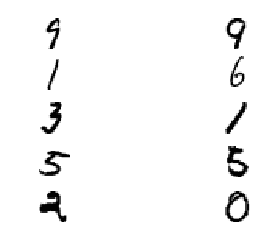

In [69]:
#plt.figure(figsize=(3, 3 * batch_size))
plt.subplot(121)
plt.imshow(X_batch[:,0].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.subplot(122)
plt.imshow(X_batch[:,1].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()


In [70]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [71]:
X_test1, y_test1 = generate_batch(X_test, y_test, batch_size=len(X_test))

In [72]:

n_epochs = 100
batch_size = 500

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = generate_batch(X_train1, y_train1, batch_size)
            loss_val, _ = sess.run([loss, training_op], feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Train loss:", loss_val)
        if epoch % 5 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test1, y: y_test1})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_6/my_digit_comparison_model.ckpt")

0 Train loss: 0.492426
0 Test accuracy: 0.7861
1 Train loss: 0.334813
2 Train loss: 0.290434
3 Train loss: 0.253434
4 Train loss: 0.217843
5 Train loss: 0.17127
5 Test accuracy: 0.9185
6 Train loss: 0.207128
7 Train loss: 0.172275
8 Train loss: 0.166782
9 Train loss: 0.161094
10 Train loss: 0.125131
10 Test accuracy: 0.9425
11 Train loss: 0.159824
12 Train loss: 0.124752
13 Train loss: 0.112234
14 Train loss: 0.114502
15 Train loss: 0.0950093
15 Test accuracy: 0.9532
16 Train loss: 0.119296
17 Train loss: 0.0754429
18 Train loss: 0.112295
19 Train loss: 0.133708
20 Train loss: 0.113547
20 Test accuracy: 0.9596
21 Train loss: 0.0674081
22 Train loss: 0.0936297
23 Train loss: 0.0986469
24 Train loss: 0.111875
25 Train loss: 0.0735623
25 Test accuracy: 0.9675
26 Train loss: 0.0790324
27 Train loss: 0.0487644
28 Train loss: 0.0869072
29 Train loss: 0.0694422
30 Train loss: 0.0600889
30 Test accuracy: 0.9663
31 Train loss: 0.103903
32 Train loss: 0.0535953
33 Train loss: 0.0310679
34 Train 

In [75]:
reset_graph()



n_inputs = 28 * 28  # MNIST
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

dnn_outputs = dnn(X, name="DNN_A")
frozen_outputs = tf.stop_gradient(dnn_outputs)

logits = tf.layers.dense(frozen_outputs, n_outputs, kernel_initializer=he_init)
Y_proba = tf.nn.softmax(logits)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

dnn_A_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="DNN_A")

restore_saver = tf.train.Saver(var_list={var.op.name: var for var in dnn_A_vars})
saver = tf.train.Saver()

In [76]:
n_epochs = 100
batch_size = 50

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_6/my_digit_comparison_model.ckpt")

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_7/my_mnist_model_final.ckpt")

INFO:tensorflow:Restoring parameters from E:/python_work/handson_ml/tf_logs/run_20170922_6/my_digit_comparison_model.ckpt
0 Test accuracy: 0.968
10 Test accuracy: 0.9734
20 Test accuracy: 0.973
30 Test accuracy: 0.9723
40 Test accuracy: 0.974
50 Test accuracy: 0.9728
60 Test accuracy: 0.9723
70 Test accuracy: 0.9728
80 Test accuracy: 0.9722
90 Test accuracy: 0.9717


In [77]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

dnn_outputs = dnn(X, name="DNN_A")

logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init)
Y_proba = tf.nn.softmax(logits)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

#dnn_A_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="DNN_A")
#restore_saver = tf.train.Saver(var_list={var.op.name: var for var in dnn_A_vars})
saver = tf.train.Saver()

In [78]:

n_epochs = 150
batch_size = 50

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train2))
        for rnd_indices in np.array_split(rnd_idx, len(X_train2) // batch_size):
            X_batch, y_batch = X_train2[rnd_indices], y_train2[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "E:/python_work/handson_ml/tf_logs/run_20170922_8/my_mnist_model_final.ckpt")

0 Test accuracy: 0.8893
10 Test accuracy: 0.9403
20 Test accuracy: 0.9476
30 Test accuracy: 0.9476
40 Test accuracy: 0.948
50 Test accuracy: 0.9476
60 Test accuracy: 0.9476
70 Test accuracy: 0.9472
80 Test accuracy: 0.9475
90 Test accuracy: 0.9472
100 Test accuracy: 0.9472
110 Test accuracy: 0.9474
120 Test accuracy: 0.9474
130 Test accuracy: 0.9474
140 Test accuracy: 0.9475
